In [1]:
# import random search, random forest, iris data, and distributions

%matplotlib notebook
from sklearn.model_selection import cross_validate
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

possible used library https://aaronmams.github.io/A-quick-and-dirty-machine-learning-post-with-Python-and-scikit-learn/

In [2]:
import pandas as pd
data = pd.read_csv('HaitiPixels_good_01.csv')  
data.head()

,Type,Red,Green,Blue
0,0,104,89,63
1,0,101,80,60
2,0,103,87,69
3,0,107,93,72
4,0,109,99,68


In [3]:
from sklearn import datasets
X=data[['Red', 'Green', 'Blue']]  # Features
y=data['Type']  # Labels
X.columns = ['Red','Green','Blue']
y.columns = ['Target']

https://www.kaggle.com/diegosch/classifier-evaluation-using-confusion-matrix

In [4]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [5]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix

qda = QuadraticDiscriminantAnalysis().fit(X_train, y_train)
qda_predicted = qda.predict(X_test)
confusion = confusion_matrix(y_test, qda_predicted)

print('Quadratic Discriminant Analysis classifier (default settings)\n', confusion)

Quadratic Discriminant Analysis classifier (default settings)
 [[309626   2250]
 [     1   2696]]


In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, qda_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, qda_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, qda_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, qda_predicted)))

Accuracy: 0.99
Precision: 0.55
Recall: 1.00
F1: 0.71


<IPython.core.display.Javascript object>


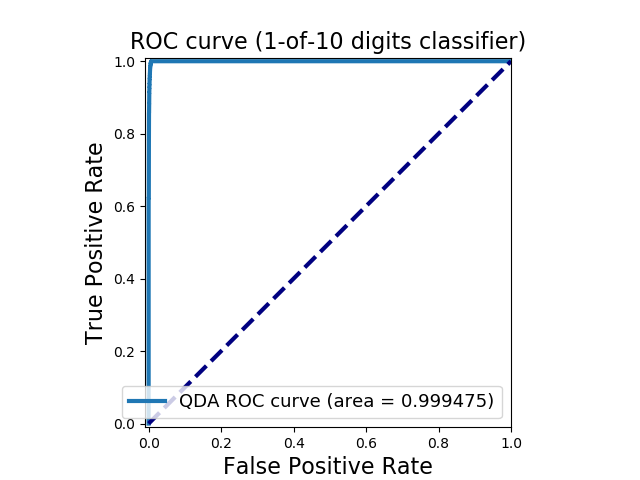

C:\Users\gladi\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


In [7]:
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

y_score_qda = qda.fit(X_train, y_train).decision_function(X_test)
fpr_qda, tpr_qda, _ = roc_curve(y_test, y_score_qda)
roc_auc_qda = auc(fpr_qda, tpr_qda)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_qda, tpr_qda, lw=3, label='QDA ROC curve (area = {:0.6f})'.format(roc_auc_qda))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

In [8]:
y_proba_qda = qda.fit(X_train, y_train).predict_proba(X_test)
y_proba_list = list(zip(y_test[0:20], y_proba_qda[0:20,1]))

# show the probability of positive class for first 20 instances
y_proba_list

[(0, 6.819317405467946e-07),
 (0, 0.00010189869424461273),
 (0, 4.312090958624164e-10),
 (0, 2.164272991971831e-05),
 (0, 2.3661788257628815e-06),
 (0, 6.09480705375479e-06),
 (0, 2.0564523513689933e-05),
 (0, 5.59182727558957e-06),
 (0, 7.157049343692382e-05),
 (0, 7.333540188077549e-05),
 (0, 3.993668589106003e-06),
 (0, 0.03478146008770821),
 (0, 0.001365769902922971),
 (0, 9.23089544779473e-06),
 (0, 2.322216428218759e-09),
 (0, 8.936307001037082e-05),
 (0, 5.3435795328055576e-05),
 (0, 4.102553712505274e-06),
 (0, 0.0002738580588364204),
 (0, 3.786889430958133e-06)]

In [9]:
y_scores_qda = qda.fit(X_train, y_train).decision_function(X_test)
y_score_list = list(zip(y_test[0:20], y_scores_qda[0:20]))

# show the decision_function scores for first 20 instances
y_score_list

[(0, -14.19833558935482),
 (0, -9.191429528017661),
 (0, -21.56442800182444),
 (0, -10.740819317420158),
 (0, -12.954231847610535),
 (0, -12.008067357186425),
 (0, -10.791922561584858),
 (0, -12.094198849436998),
 (0, -9.544756098716917),
 (0, -9.520393755121672),
 (0, -12.430796309926167),
 (0, -3.3232700532146),
 (0, -6.594670274489053),
 (0, -11.592945268288098),
 (0, -19.880743748018176),
 (0, -9.322713681197989),
 (0, -9.836976274846746),
 (0, -12.403896818878012),
 (0, -8.202626723680805),
 (0, -12.483961819575013)]

<IPython.core.display.Javascript object>


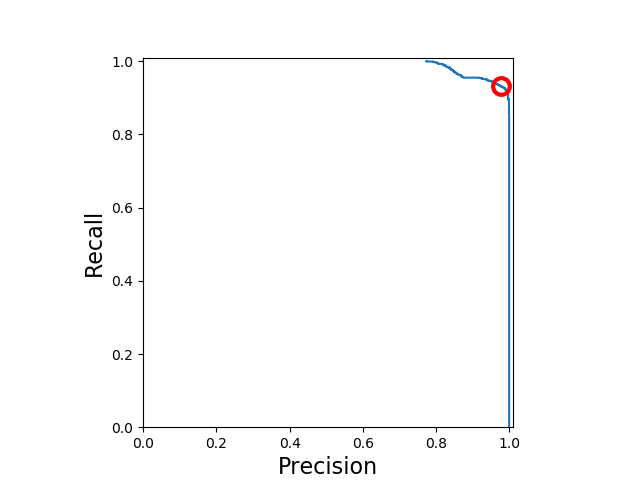

C:\Users\gladi\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


In [17]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()